In [2]:
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
#read image
filename = glob.glob('./*_edited.jpg')[-1]
bgr = cv2.imread(filename)
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(bgr,cv2.COLOR_BGR2HSV)
hsv[:,:,0] = hsv[:,:,1]
hsv[:,:,2] = hsv[:,:,1]
# rgba = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGBA)

In [4]:
def KMeansSeg(img,k):
    vectorized = img.reshape((-1,3))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = k
    attempts=10
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    seg_img = res.reshape((img.shape))
    return seg_img

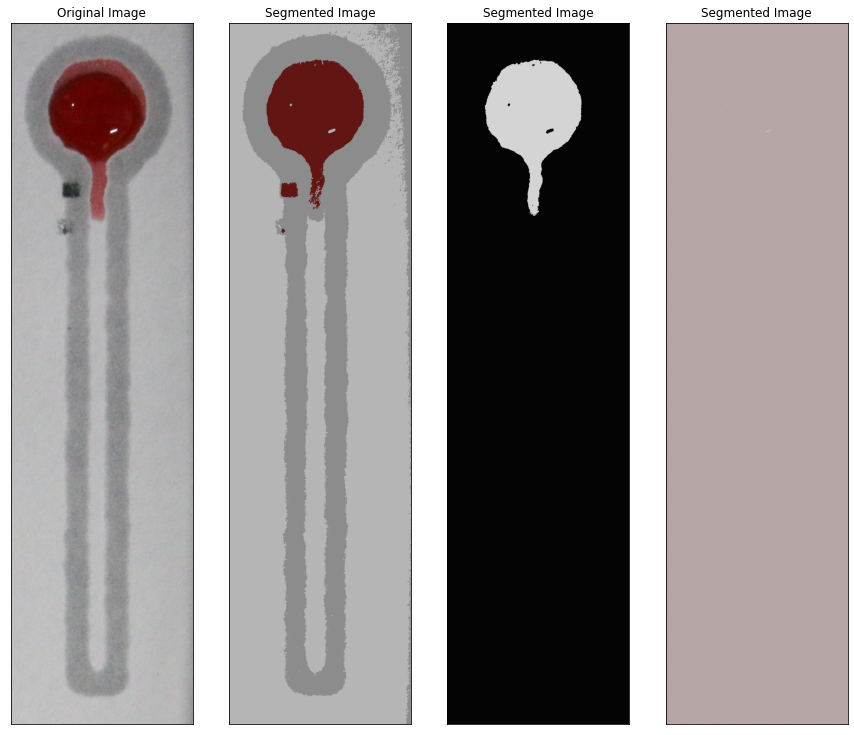

In [121]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,4,1),plt.imshow(rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

rgb_seg = KMeansSeg(rgb,k=3)
plt.subplot(1,4,2),plt.imshow(rgb_seg)
plt.title('Segmented Image' ), plt.xticks([]), plt.yticks([])

hsv_seg = KMeansSeg(hsv,k=2)
plt.subplot(1,4,3),plt.imshow(hsv_seg)
plt.title('Segmented Image' ), plt.xticks([]), plt.yticks([])

plt.show()

1.710616111755371


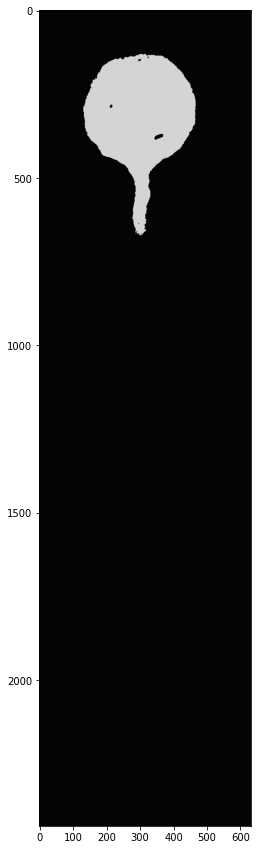

In [9]:
import time 
start = time.time()
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
hsv_seg = KMeansSeg(hsv,k=2)
plt.imshow(hsv_seg)
print(time.time()-start)
# plt.title('Segmented Image' )